**Aikins Acheampong**

CS 251/2: Data Analysis and Visualization

# Lab 7 | Visualizing Radial Basis Function Neural Networks

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance
from sklearn.cluster import KMeans



## Task 1: Load dataset and initialize variables

### 1a. Import Data

Below, using numpy [load](https://numpy.org/doc/stable/reference/generated/numpy.load.html) load in the sample data (`x_24.npy`) and class labels (`y_24.npy`). The dataset has 5000 samples.

In [7]:
x_24= np.load('data/x_24.npy')
y_24 = np.load('data/y_24.npy')

### 1b. Create Clusters

In the RBF neural network, the number of neurons in the hidden layer will be `8`.

1. Create an instance of the [KMeans clustering algorithm class](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), with the number of clusters as the number of neurons in the hidden layer. Set the keyword argument `n_init` to `10` (*the number of times to run K-means*).
    1. Calculate the `cluster_assignments` by fitting the KMeans clustering algorithm to all samples (`x_24`).
    2. Assign the cluster centroids to the variable `prototypes`.  
2. Calculate the `sigmas` for each cluster, the sigma is the mean distance between a prototype and all the samples assigned to the same cluster.
    1. The length of `sigmas` array should be equal to the number of hidden neurons.
    2. In the lab (*but not the project*) you can use [cdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html) to compute distance between the centroid and the data samples assigned to it. `cdist` expects two 2D arrays, so you will need to make your prototype a 2D array.

In [6]:
# KEEP ME
np.random.seed(10)

num_neurons = 8 
kmeans = KMeans(n_clusters=num_neurons, n_init=10, random_state=42)

kmeans.fit(x_24)

cluster_assignments = kmeans.labels_
prototypes = kmeans.cluster_centers_ 


sigmas = []

for i in range(num_neurons):
    cluster_points = x_24[cluster_assignments == i]
    

    distances = distance.cdist(prototypes[i].reshape(1, -1), cluster_points)
    
    sigma = np.mean(distances)
    sigmas.append(sigma)

sigmas = np.array(sigmas)

# Output
print("Prototypes (Cluster Centroids):", prototypes)
print("Sigmas (Mean Distances):", sigmas)


Prototypes (Cluster Centroids): [[ 0.30344104  0.96943122]
 [ 1.62275122 -0.42425042]
 [ 0.04749248  0.07057151]
 [-1.01487705  0.31072378]
 [ 1.93662031  0.28610404]
 [ 0.73015269 -0.45908606]
 [-0.49772912  0.92474705]
 [ 0.91578511  0.44234841]]
Sigmas (Mean Distances): [0.33402254 0.33181541 0.34330127 0.33143982 0.35420358 0.32992977
 0.31237495 0.32941341]


### 1c. Visualize Clusters

1. Create a scatterplot of the training data with the x coordinates, y coordinates, coloring the points according to the class label.
2. On the same plot as the scatterplot. Draw the clusters
    1. For each cluster, draw a [circle](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Circle.html) with the center at the prototype coordinates, using its sigma as the radius.  
    2. Add the circle to the axis. [add_patch](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.add_patch.html)
    3. Set the alpha of the circles to be partially transparent and the `facecolor` and `edgecolor` to something easily differentiated from the data.
3. Title the plot.

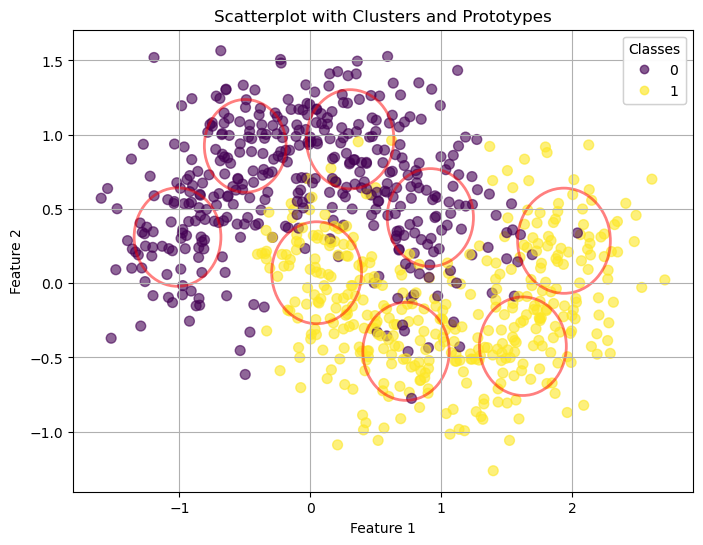

In [8]:
from matplotlib.patches import Circle

plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_24[:, 0], x_24[:, 1], c=y_24, cmap='viridis', s=50, alpha=0.6, label='Data Points')

legend1 = plt.legend(*scatter.legend_elements(), title="Classes", loc="upper right")
plt.gca().add_artist(legend1)

for i in range(len(prototypes)):
    prototype = prototypes[i]
    sigma = sigmas[i]
    
    circle = Circle(
        prototype,
        sigma, 
        edgecolor='red',
        facecolor='none',
        linewidth=2,
        alpha=0.5 
    )
    plt.gca().add_patch(circle)

plt.title('Scatterplot with Clusters and Prototypes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

# Show the plot
plt.show()


## Task 2. Visualize Model

1. Create a scatter plot of the training data with the x coordinates, y coordinates, coloring the points using the class label.
2. On the same plot as the scatter plot, draw circles to represent the clusters and color them based on the resulting weights (`wts`) given below. *These are the already trained weights between the Hidden and Output layers of the RBF network.*
    1. For each cluster, draw a circle with the center at the prototype coordinates, using the sigma as the radius. 
    2. Set the alpha of the circles to be semi-transparent.
    3. Using the weights, determine whether each hidden neuron is most associated with the 1st or 2nd data class. The class associated with each neuron (each row of `wts`) is defined as the index of the column (class) that yields the greatest weight. Color the classes differently (*i.e. one of two colors*) with `facecolors` and a black `edgecolor`. Each of the `K` hidden neurons should have an associated class.
3. Title the plot.

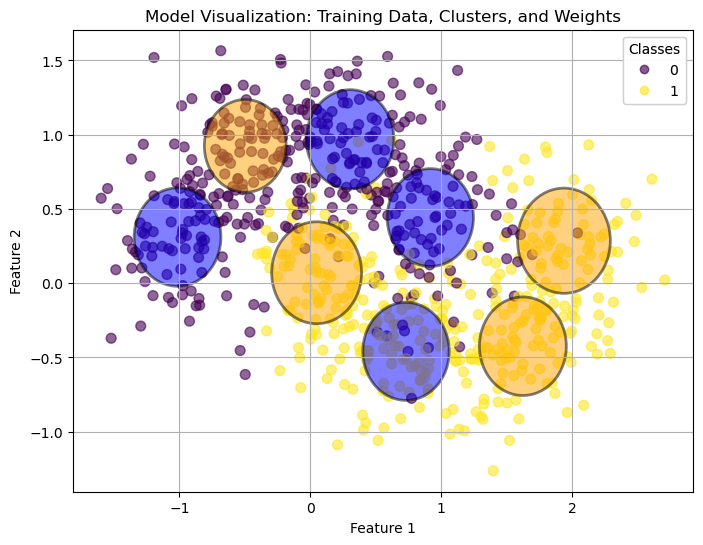

In [9]:
# KEEP ME
wts = np.array([[ 0.68767607, -0.68767607],
       [-0.46745546,  0.46745546],
       [-0.56568621,  0.56568621],
       [ 0.55736802, -0.55736802],
       [-0.45171637,  0.45171637],
       [ 0.62908217, -0.62908217],
       [-0.52861136,  0.52861136],
       [ 0.62172913, -0.62172913]])

# Your code here (it needs to use the wts)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_24[:, 0], x_24[:, 1], c=y_24, cmap='viridis', s=50, alpha=0.6, label='Data Points')

legend1 = plt.legend(*scatter.legend_elements(), title="Classes", loc="upper right")
plt.gca().add_artist(legend1)

for i, (prototype, sigma) in enumerate(zip(prototypes, sigmas)):
    neuron_class = np.argmax(wts[i])
    
    facecolor = 'blue' if neuron_class == 0 else 'orange'

    circle = Circle(
        prototype,
        sigma,
        facecolor=facecolor,
        edgecolor='black',
        linewidth=2,
        alpha=0.5
    )

    plt.gca().add_patch(circle)

plt.title('Model Visualization: Training Data, Clusters, and Weights')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

plt.show()

